In [1]:
import pandas as pd
df=pd.read_csv('pizza/pizza_sales.csv')

In [4]:
df

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [6]:
total_orders = df['order_id'].nunique()
print(total_orders)
total_revenue = df['total_price'].sum()
print(total_revenue)

21350
817860.05


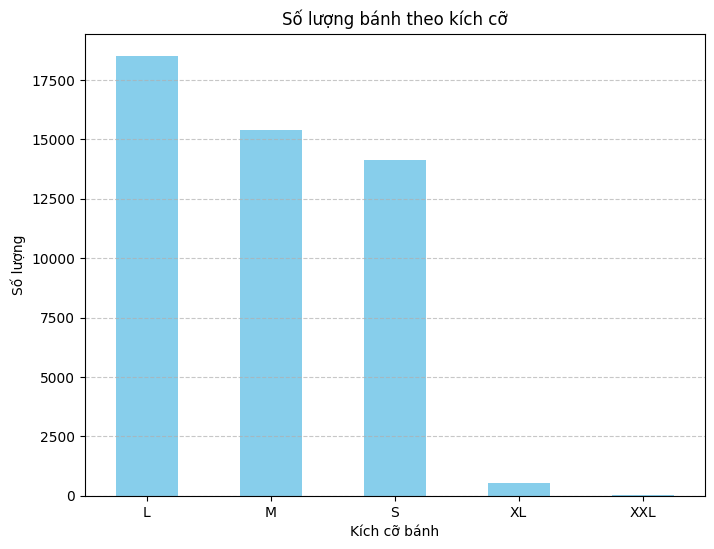

In [8]:
import matplotlib.pyplot as plt
size_counts = df['pizza_size'].value_counts()

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
size_counts.plot(kind='bar', color='skyblue')
plt.title('Số lượng bánh theo kích cỡ')
plt.xlabel('Kích cỡ bánh')
plt.ylabel('Số lượng')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

size được mua nhiều nhất là size L vì sai L có kích thước vừa phù hợp hầu hết mọi nhu cầu của gia đình hay các cặp đôi
size XXL được mua rất ít vì kích thước của nó rất lớn không phù hợp với hầu hết nhu cầu của mọi người

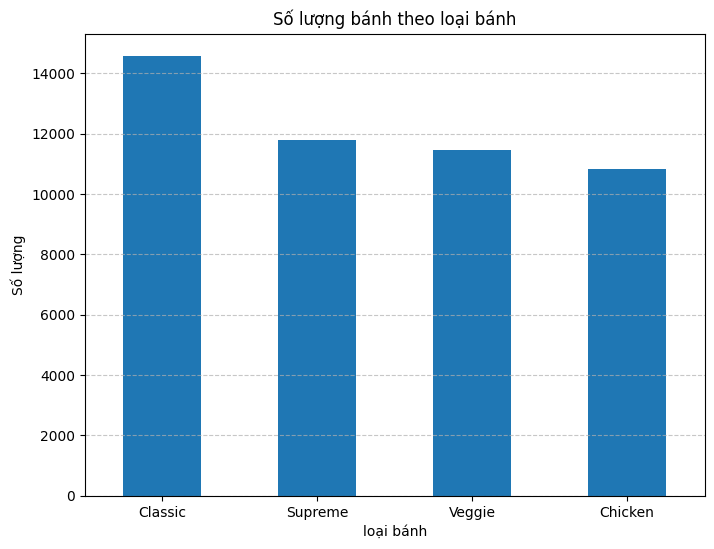

In [11]:
category_counts = df['pizza_category'].value_counts()

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar')
plt.title('Số lượng bánh theo loại bánh')
plt.xlabel('loại bánh')
plt.ylabel('Số lượng')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

loại class đc bán nhiều nhất do các bánh trong loại này rất phổ biến được nhiều người ưu chuộm

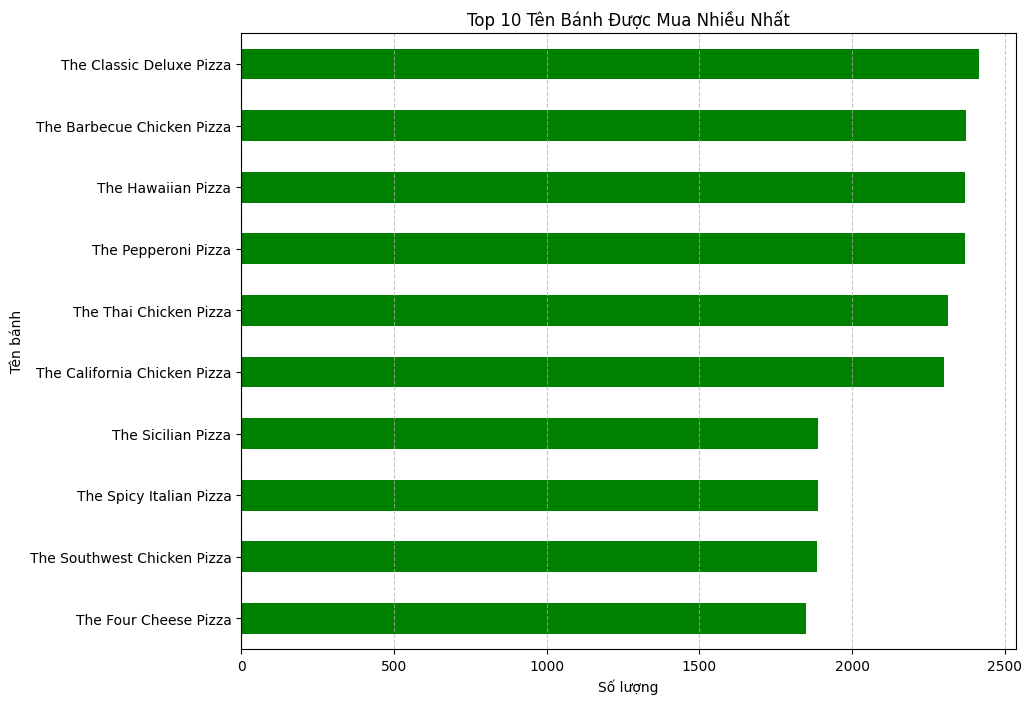

In [16]:
pizza_counts = df['pizza_name'].value_counts()

# Lấy top 10 tên bánh
top_10_pizzas = pizza_counts.head(10)

# Vẽ biểu đồ
plt.figure(figsize=(10, 8))
top_10_pizzas.plot(kind='barh', color='green')
plt.title('Top 10 Tên Bánh Được Mua Nhiều Nhất')
plt.xlabel('Số lượng')
plt.ylabel('Tên bánh')
plt.gca().invert_yaxis()  # Đảo ngược trục y để tên bánh phổ biến nhất nằm trên cùng
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

tại sao loại 'chicken' được mua ít nhất trong các loại nhưng có piza 'the barbecue chicken pizza' là piza được mua nhiều thứ 2?
- có thể có pizza khác trong loại chicken không ngon nên mọi người thường chỉ đặt nhiều 'the barbecue chicken pizza' còn các pizza khác trong loại chicken thì ít được đặt nên số đơn hàng bán của loại chicken mới ít nhất

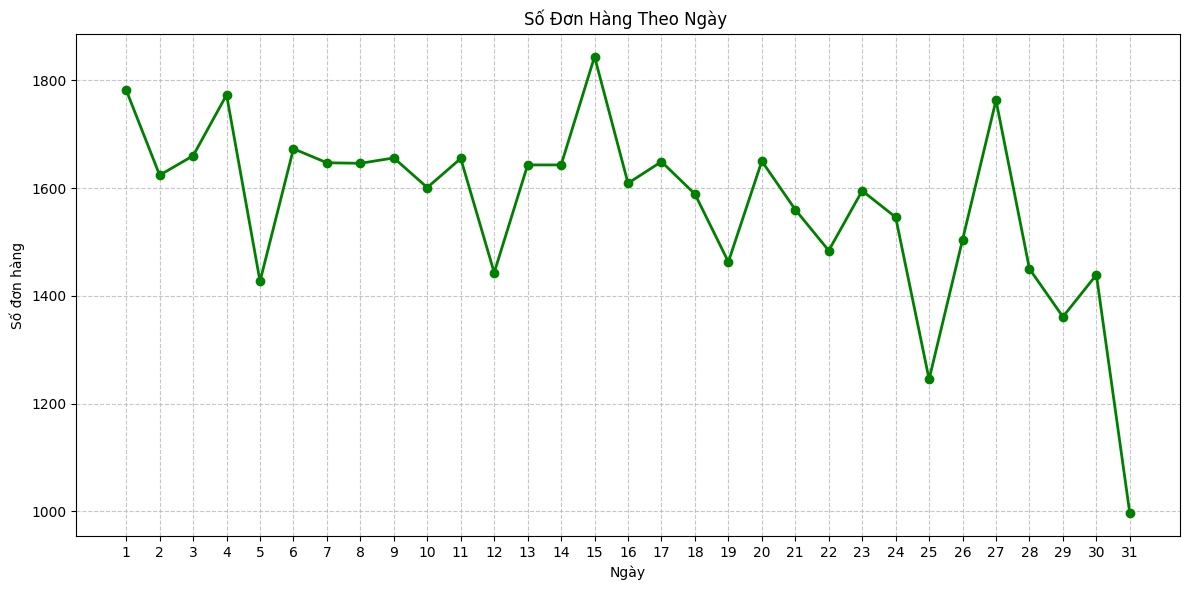

In [19]:
df['order_date'] = pd.to_datetime(df['order_date'], format='%d-%m-%Y')
df['day']=df['order_date'].dt.day
# Tính số đơn hàng theo ngày
daily_orders = df.groupby('day').size()
plt.figure(figsize=(12, 6))
daily_orders.sort_index().plot(kind='line', marker='o', color='green', linestyle='-', linewidth=2, markersize=6)
plt.title('Số Đơn Hàng Theo Ngày ')
plt.xlabel('Ngày')
plt.ylabel('Số đơn hàng')
plt.xticks(range(1, 32))  # Đảm bảo tất cả các ngày đều có nhãn
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

ngày 15 có số lượng đơn đặt hàng lớn nhất trong các ngày của thàng
tại sao ?
- có thể do ngày 15 hàng tháng là ngày lấy lương nên mọi người có xu hướng đặt nhiều pizza để ăn mừng ngày lấy lương

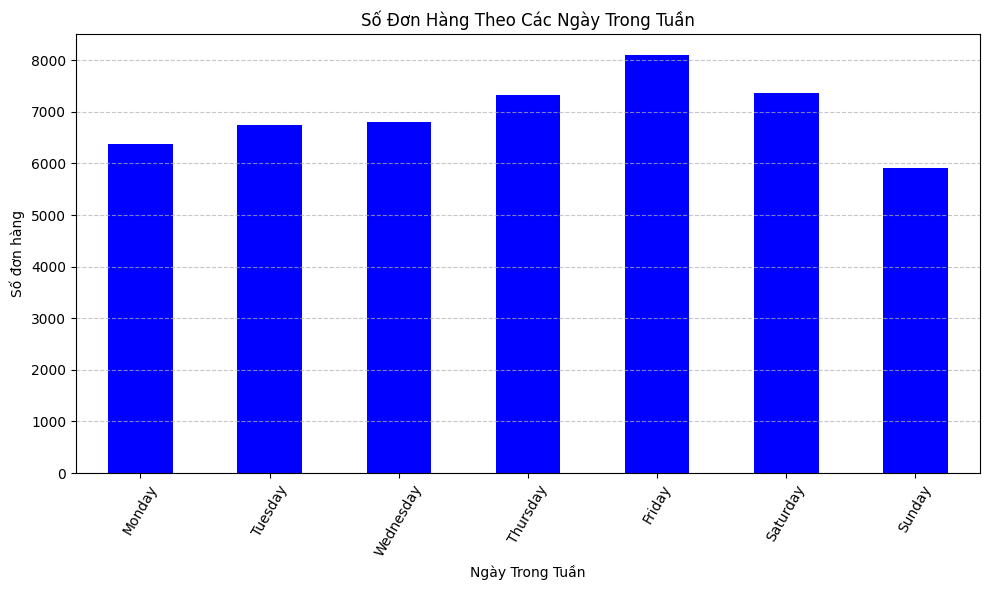

In [21]:
df['order_date'] = pd.to_datetime(df['order_date'], format='%d-%m-%Y')

# Thêm cột ngày trong tuần
df['day_of_week'] = df['order_date'].dt.day_name()

# Tính số đơn hàng theo ngày trong tuần
weekly_orders = df['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Vẽ biểu đồ số đơn hàng theo ngày trong tuần
plt.figure(figsize=(10, 6))
weekly_orders.plot(kind='bar', color='blue')
plt.title('Số Đơn Hàng Theo Các Ngày Trong Tuần')
plt.xlabel('Ngày Trong Tuần')
plt.ylabel('Số đơn hàng')
plt.xticks(rotation=60)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

ngày thứ 6 có nhiều đơn đặt hàng nhất trong tuần
- do thứ 6 là ngày cuối đi làm trong tuần nên mọi người có xu hướng đi chơi đi ăn đặt pizza để ăn sau một tuần làm việc vất vả.

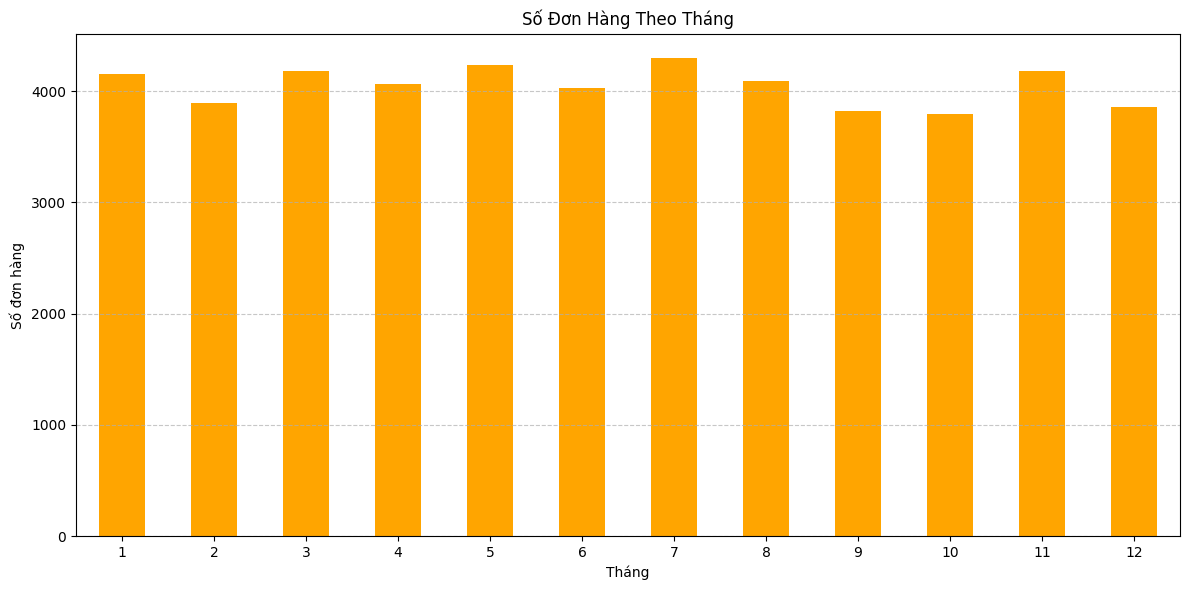

4301


In [28]:
df['month'] = df['order_date'].dt.month

# Tính số đơn hàng theo tháng
monthly_orders = df['month'].value_counts().sort_index()

# Vẽ biểu đồ số đơn hàng theo tháng
plt.figure(figsize=(12, 6))
monthly_orders.plot(kind='bar', color='orange')
plt.title('Số Đơn Hàng Theo Tháng')
plt.xlabel('Tháng')
plt.ylabel('Số đơn hàng')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print(monthly_orders.max())

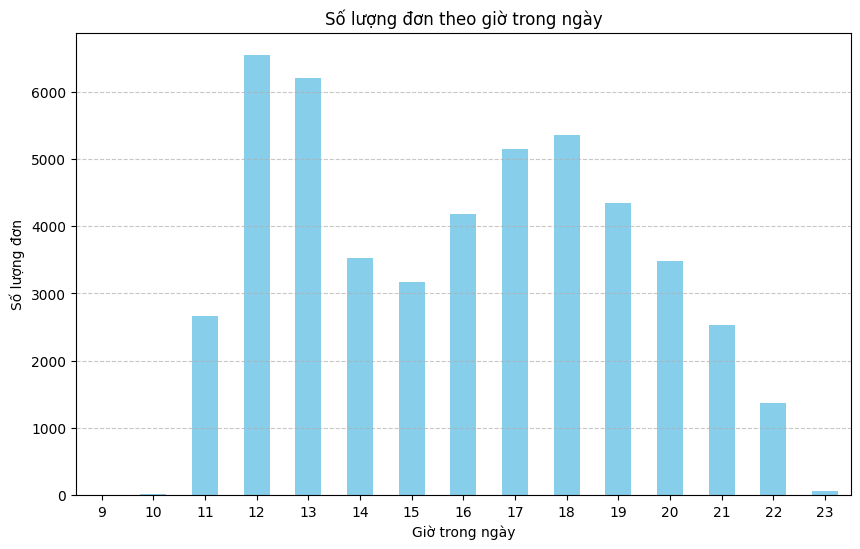

In [30]:
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S').dt.hour
orders_per_hour = df['order_time'].value_counts().sort_index()

# Vẽ biểu đồ số đơn theo giờ
plt.figure(figsize=(10, 6))
orders_per_hour.plot(kind='bar', color='skyblue')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số lượng đơn')
plt.title('Số lượng đơn theo giờ trong ngày')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

từ 12-13 h có số lượng đơn hàng rất lớn
- đây là h nghỉ trưa nên lượng đơn đặt nhiều
- nhiều hơn biểu tối vì h nghỉ trưa ngắn nên mọi người chọn những đồ ăn nhanh đặc biệt là pizza còn buổi tối thời gian nghỉ ăn ăn nhiều nên mọi người thường sẽ ăn những món ăn mik nấu hoặc ra ngoài nhà hàng ăn hơn là đặt đồ ăn nhanh
* chúng ta có thể chạy quảng cáo vào khung h này để thúc đẩy doanh số cửa hàng.

In [32]:
df_dup = df[df['order_id'].duplicated(keep=False)]
groupProduct = lambda products: ', '.join(products)
df_dup['All Products'] = df_dup.groupby('order_id')['pizza_name'].transform(groupProduct)
df_dup = df_dup[['order_id', 'All Products']].drop_duplicates()
pizza_counts = df_dup['All Products'].value_counts()
print(pizza_counts.head(10))

All Products
The Pepperoni Pizza, The Thai Chicken Pizza                 39
The California Chicken Pizza, The Thai Chicken Pizza        38
The Classic Deluxe Pizza, The Hawaiian Pizza                38
The Barbecue Chicken Pizza, The California Chicken Pizza    36
The Barbecue Chicken Pizza, The Classic Deluxe Pizza        35
The Barbecue Chicken Pizza, The Thai Chicken Pizza          34
The Four Cheese Pizza, The Pepperoni Pizza                  33
The California Chicken Pizza, The Hawaiian Pizza            31
The California Chicken Pizza, The Pepperoni Pizza           30
The Big Meat Pizza, The Classic Deluxe Pizza                29
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_11448\2562896803.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All Products'] = df_dup.groupby('order_id')['pizza_name'].transform(groupProduct)


ta có 3 combo này được đặt nhiều cùng nhau nhất là 
The Pepperoni Pizza, The Thai Chicken Pizza                
The California Chicken Pizza, The Thai Chicken Pizza        
The Classic Deluxe Pizza, The Hawaiian Pizza 
- từ đó cửa hàng có thể tạo ra một số combo dựa trên các sản phẩm được đặt cùng nhau để thúc đẩy doanh số của cửa hàng.